# Importação das bibliotecas

In [32]:
import pandas as pd
from scipy.stats import norm
import numpy as np

# Carregamento dos dados

In [24]:
dados = pd.read_csv('/Users/mikeiasoliveira/Downloads/02 - Outros/microdados_enem_2020/DADOS/MICRODADOS_ENEM_2020.csv', encoding='latin-1', sep=';')

In [25]:
dados.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


In [26]:
dados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

# Seleção das amostras

Será coletada uma amostra dos dados para fins de análise devido a limitações computacionais. A base de dados dispõe de 5.783.109 de linhas com 75 colunas. 
Para uma análise da nota de redação, será coletada uma amostra, assim como para todos os demais parâmetros analisados

## Seleção do tamanho das amostras - Nota da redação

In [27]:
norm.ppf(0.975)

1.959963984540054

Utilizando método para garantir representativa da amostra em relação a população, considerando um nível de confiança de $95$% 

In [28]:
z = 1.96                          # Garantindo nível de confiança de 95% a partir de z = 1,96
N = dados.shape[0]                # Tamanho da população
std = dados.NU_NOTA_REDACAO.std() # Desvio padrão da população
e = 20                            # Inferência de erro

n = ((z **2) * std ** 2) / e **2       # Tamanho amostral
n = int(n.round())
n

383

In [29]:
dados.TP_COR_RACA.unique()

array([2, 3, 1, 0, 4, 5])

In [33]:
dados = dados[['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']].dropna()

dados_sample = dados.sample(n)    # Extraindo amostra aleatória simples

In [30]:
samples = []

for i in dados.TP_COR_RACA.unique():
    samples.append(dados.loc[dados.TP_COR_RACA == i].sample(n))

amostra_estratificada = pd.concat(samples)

In [31]:
(amostra_estratificada.shape[0] / n) == len(dados.TP_COR_RACA.unique())

True

In [34]:
dados_sample

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
2605514,200001612691,2020,2,F,1,1,1,2,0,2,...,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,120.0,200.0,140.0,140.0,160.0,760.0
2471839,200006200721,2020,3,F,1,1,1,2,0,2,...,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,120.0,120.0,120.0,120.0,80.0,560.0
840696,200006633667,2020,3,F,1,3,1,2,0,2,...,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,160.0,160.0,140.0,160.0,180.0,800.0
3237709,200003981798,2020,2,M,1,3,1,2,0,3,...,BDDBECECBACDBDEEBDEDDAECDDCCADECBCCCBBEDABCDE,AACDEEEECADBBCAAADBADEABEBAAADEBADADAEBDACAACB...,BAECDBBXCCCBDBACCDBEEEBCCAABCCACEACCEDBCABCDA,1.0,160.0,160.0,140.0,160.0,180.0,800.0
2281981,200005805808,2020,3,M,1,3,1,2,0,2,...,DECCADEBDECBBECDDCBACDBDEEDABCDDAEDBECECBCCBD,DCEAAEEEACAACBBEBEBAAADBBAEBCEDBAADADDEADEBDAC...,DABCCAEDBBCCCABCACCBDXCCCBEEEDBBACCDACBAEBAEC,1.0,80.0,120.0,100.0,80.0,60.0,440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689413,200006797052,2020,2,M,1,3,1,2,0,2,...,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,160.0,180.0,180.0,200.0,160.0,880.0
5568531,200005653417,2020,3,M,1,3,1,2,0,3,...,CDEEAEDCDEDCDDBDBCEECBAABACAABEAEECDDCBAEABCE,EEABEEDADDDDCEBEBEAAADBDBCCCCABCEDAEBAEEECDBDA...,CDBEAAECBADABCCAEBDBBADEDDBBCEAEBBADCEECADADE,1.0,100.0,120.0,80.0,100.0,120.0,520.0
644863,200005028234,2020,5,F,1,2,1,2,0,2,...,DABCBDDDAEDBECECBBEDEBDEECBCCCBACDCCADEBDECDD,AAEDCACEEECEAACBAEBBEDACDBAADADDEBBEBAAADEACAA...,AEBCCXCCCACCDABCCABCABCBAECEDBBDBEEEDBBACCDAC,1.0,120.0,40.0,40.0,100.0,40.0,340.0
305485,200002982958,2020,2,M,1,0,1,2,0,3,...,BDECBCCDEDDAEBDCDDCBBEDABCCBACDBDEECCADEDBECE,CDEAACAEEEBEBADADAAAAACBAEBDEADACDBBDBACECAAAD...,CABCAACCACDABEEEBAECXCCCEEDBACCDBCCABBCCBDDBB,1.0,120.0,120.0,120.0,120.0,80.0,560.0


<AxesSubplot: >

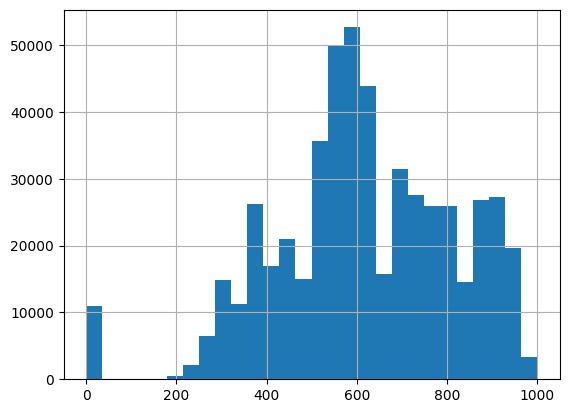

In [35]:
bins_dados = int(5 * np.log10(dados.shape[0]))
dados.NU_NOTA_REDACAO.hist(bins = bins_dados)      # Exibindo histograma da população

<AxesSubplot: >

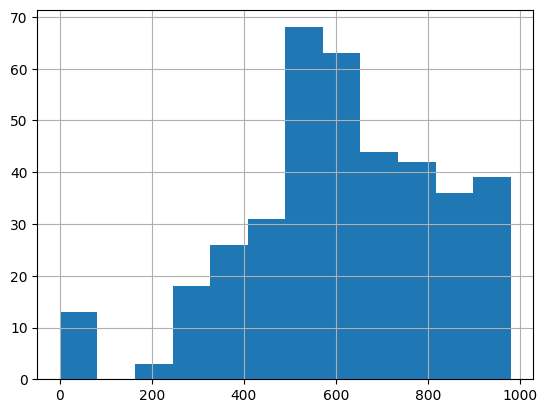

In [36]:
bins_sample = int(5 * np.log10(dados_sample.shape[0]))
dados_sample.NU_NOTA_REDACAO.hist(bins = bins_sample)     # Exibindo histograma da Amostra

In [37]:
dados_sample.to_csv('/Users/mikeiasoliveira/Documents/Projetos/análise_dados_enem/analise-dados-enem/dados/amostras/amostra-redacao.csv', index = False, sep =';')
amostra_estratificada.to_csv('/Users/mikeiasoliveira/Documents/Projetos/análise_dados_enem/analise-dados-enem/dados/amostras/amostra-estratificada-raca.csv', index = False, sep =';')